In [1]:
import sys
import os
import json
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from datetime import datetime

BASE_PATH: Path = Path().cwd()
sys.path.append(BASE_PATH)

In [2]:
class DataPaths:

    def __init__(self) -> None:
        self.blockchain_size_path: str = os.path.join(BASE_PATH,"data","blocks-size.json")
        self.market_prize_path: str = os.path.join(BASE_PATH,"data","market-price.json")
        self.n_transactions_path: str = os.path.join(BASE_PATH,"data","n-transactions-total.json")
        self.energy_comnsumption:str = os.path.join(BASE_PATH,"data","konsumpcja_energii_bitcoin.csv")
        self.co2_emission:str = os.path.join(BASE_PATH,"data","co2_emission.csv")

    @property
    def blockchain_size_data(self) -> dict:
        with open(self.blockchain_size_path,"r") as file_bytes:
            data:dict = json.load(file_bytes)
        return data
    
    @property
    def n_transactions_data(self) -> dict:
        with open(self.n_transactions_path,"r") as file_bytes:
            data:dict = json.load(file_bytes)
        return data
    
    @property
    def market_prize_data(self) -> dict:
        with open(self.market_prize_path,"r") as file_bytes:
            data:dict = json.load(file_bytes)
        return data
    
paths = DataPaths()

## <font color='Orange'> Blockchain Size  Graph </font>

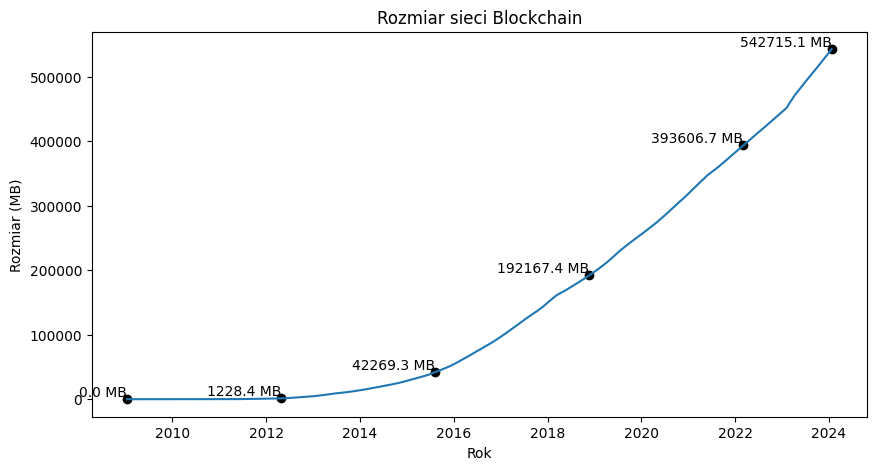

In [3]:
data = paths.blockchain_size_data['blocks-size']
x= []
y =[]
plt.figure(figsize=(10, 5))

for cords in data:
    x.append(datetime.fromtimestamp(cords['x']/1000))
    y.append(cords['y'])

plt.xlabel('Rok')
plt.ylabel('Rozmiar (MB)')
plt.title("Rozmiar sieci Blockchain")
label_indices = np.arange(0, len(x), 300)
label_indices = np.append(label_indices,len(x)-1)

for i in label_indices:
    plt.scatter(x[i], y[i], color='black',)
    plt.text(x[i], y[i], f'{y[i]:.1f} MB', ha='right', va='bottom')

plt.plot(x,y)
#plt.savefig('rozmiar_blockchain.png')


## <font color='Orange'> Ilość Transakcji na sieci blockchain </font>

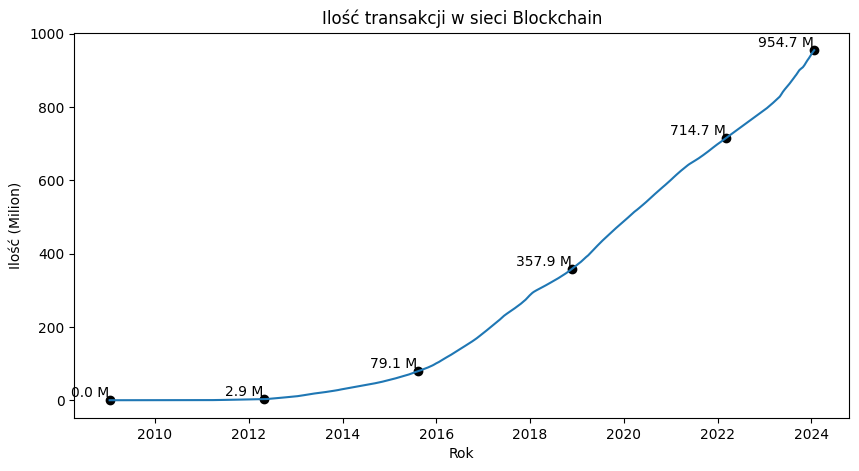

In [4]:
data = paths.n_transactions_data['n-transactions-total']
x= []
y =[]

plt.figure(figsize=(10, 5))

for cords in data:
    x.append(datetime.fromtimestamp(cords['x']/1000))
    y.append(cords['y']/1000000)

plt.xlabel('Rok')
plt.ylabel('Ilość (Milion)')
plt.title("Ilość transakcji w sieci Blockchain")
label_indices = np.arange(0, len(x), 300)
label_indices = np.append(label_indices,len(x)-1)

for i in label_indices:
    plt.text(x[i], y[i], f'{y[i]:.1f} M', ha='right', va='bottom')
    plt.scatter(x[i], y[i], color='black',)

plt.plot(x,y)
#plt.savefig('ilosc_transkacji.png')

## <font color='Orange'> Cena Bitcoin </font>

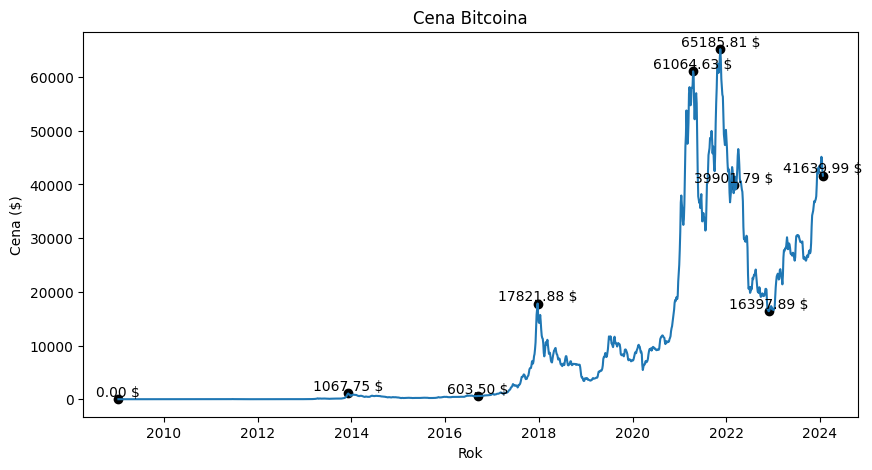

In [5]:
data = paths.market_prize_data["market-price"]
x = []
y = []

plt.figure(figsize=(10, 5))

for cords in data:
    x.append(datetime.fromtimestamp(cords["x"] / 1000))
    y.append(cords["y"])

plt.xlabel("Rok")
plt.ylabel("Cena ($)")
plt.title("Cena Bitcoina")
max_value = y.index(max(y))
max_value_2 = y.index(max(y[100:700]))
max_value_3 = y.index(max(y[700:900]))
max_value_4 = y.index(max(y[1100:1150]))
min_value1 = y.index(min(y[1100:1800]))
label_indices = np.arange(700, len(x), 500)
label_indices = np.append(
    label_indices,
    [0, max_value, max_value_2, max_value_3, max_value_4, len(x) - 1, min_value1],
)
##label_indices = np.append(label_indices,0)

for i in label_indices:
    plt.text(x[i], y[i], f"{y[i]:.2f} $", ha="center", va="bottom")
    plt.scatter(x[i], y[i], color="black")

plt.plot(x, y)
#plt.savefig('cena_btc.png')


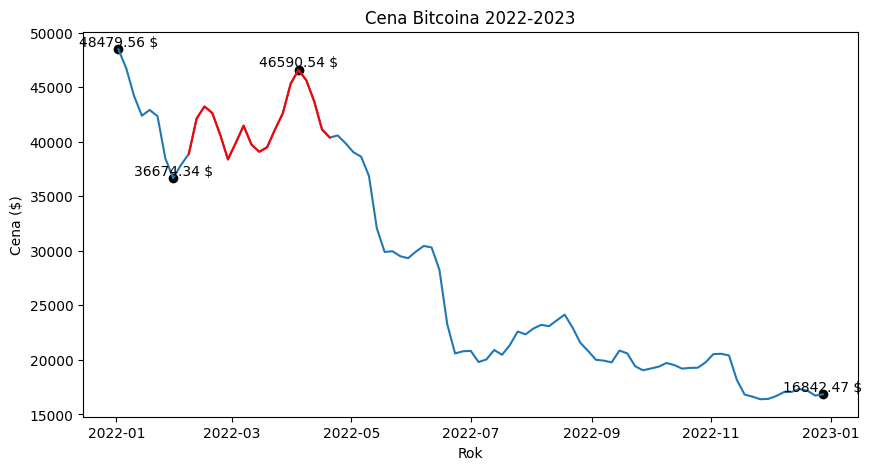

In [6]:
data = paths.market_prize_data["market-price"]
x = []
y = []

plt.figure(figsize=(10, 5))

for cords in data:
    if datetime.fromtimestamp(cords["x"] / 1000).year >= 2022 and datetime.fromtimestamp(cords["x"] / 1000).year < 2023:
        x.append(datetime.fromtimestamp(cords["x"] / 1000))
        y.append(cords["y"])
        
plt.xlabel("Rok")
plt.ylabel("Cena ($)")
plt.title("Cena Bitcoina 2022-2023")

max_value = y.index(max(y))
min_value1 = y.index(min(y[0:100]))
min_value2 = y.index(min(y[0:20]))
max_value_4 = y.index(max(y[20:50]))

label_indices = np.array(
    [0,len(x) - 1,min_value2,max_value_4],
)

for i in label_indices:
    plt.text(x[i], y[i], f"{y[i]:.2f} $", ha="center", va="bottom")
    plt.scatter(x[i], y[i], color="black")

plt.plot(x, y)
plt.plot(x[9:28],y[9:28],color ='red')

#plt.savefig('cena_btc_part.png')

## <font color='Orange'> Zużycie energii bitcoin </font>

<BarContainer object of 15 artists>

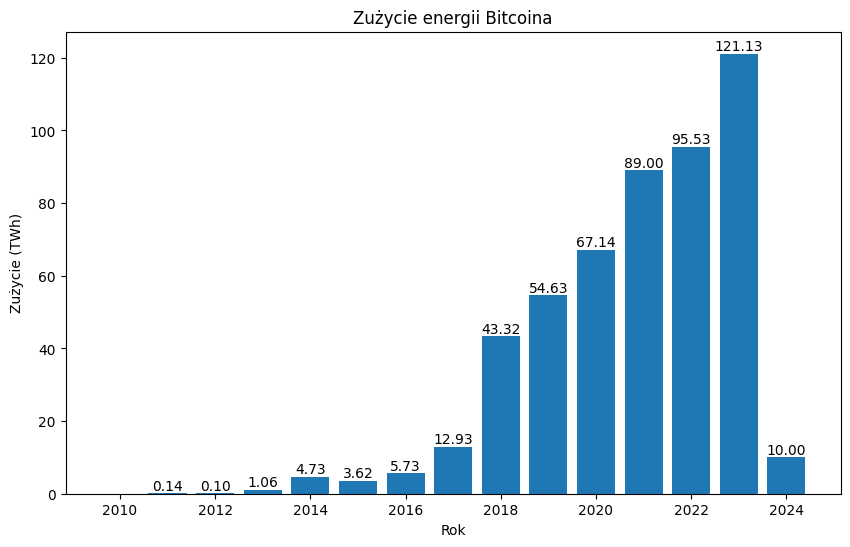

In [7]:
import pandas as pd

df = pd.read_csv(paths.energy_comnsumption,header=1)

x = df['Year'].tolist()
y = df['Yearly consumption, TWh'].tolist()
plt.figure(figsize=(10, 6))

plt.xlabel("Rok")
plt.ylabel("Zużycie (TWh)")
plt.title("Zużycie energii Bitcoina")

for i in range(1,len(x)):
    plt.text(x[i], y[i], f"{y[i]:.2f}", ha="center", va="bottom")

plt.bar(x, y)
#plt.savefig('zużycie_energii.png')

## <font color='Orange'> Emisja CO2 bitcoin </font>

<BarContainer object of 15 artists>

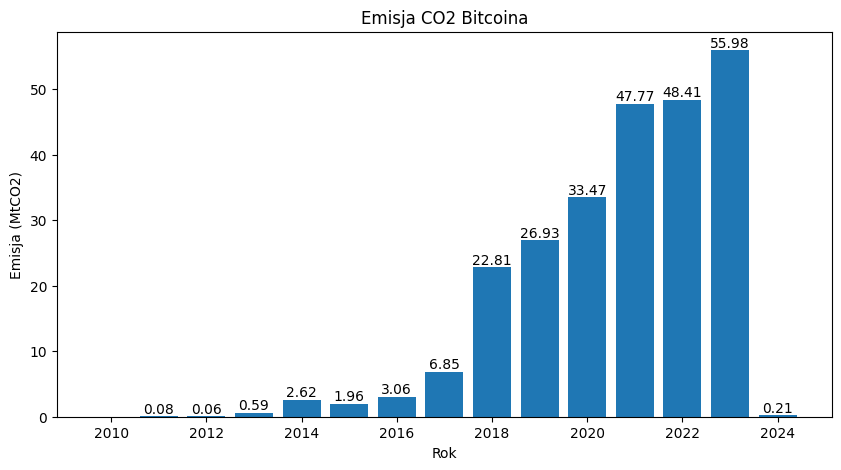

In [8]:
df = pd.read_csv(paths.co2_emission,header=1)

x = df['Year'].tolist()
y = df['Yearly emissions, MtCO2e'].tolist()
plt.figure(figsize=(10, 5))

plt.xlabel("Rok")
plt.ylabel("Emisja (MtCO2)")
plt.title("Emisja CO2 Bitcoina")

for i in range(1,len(x)):
    plt.text(x[i], y[i], f"{y[i]:.2f}", ha="center", va="bottom")

plt.bar(x, y)
#plt.savefig('CO2_emission.png')